# Analysis functions

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from src.utilities import (
    completion_at_time, 
    time_to_seconds,
    get_average_curve,
    get_triplicates_jackknife)
from src.modeling import (
    residuals,
    fit_model,
    model_one_step
)
from src.statistics import (
    wald_z,
    holm_correction
)
#Standardized color scheme for plotting
color_scheme = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                               "#312725", '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Importing data

In [2]:
data_dir = "Data/"

UW_no = pd.read_csv(data_dir + "UW_LongOH_NoInc.csv")
conditions_UW_no = {'baseline nn2' : ['B2', 'C2', 'D2'],
                    'no background nn2' : ['B3', 'C3', 'D3'],
                    'N50_25uM nn2' : ['B5', 'C5', 'D5'],
                    'N25_25uM nn2' : ['B7', 'C7', 'D7'],
                    'baseline nn1' : ['E2', 'F2', 'G2'],
                    'no background nn1' : ['E3', 'F3', 'G3'],
                    'N50_25uM nn1' : ['E5', 'F5', 'G5'],
                    'N25_25uM nn1' : ['E7', 'F7', 'G7']}
conditions_UW_no_nn1 = {'baseline nn1' : ['E2', 'F2', 'G2'],
                    'no background nn1' : ['E3', 'F3', 'G3'],
                    'N50_25uM nn1' : ['E5', 'F5', 'G5'],
                    'N25_25uM nn1' : ['E7', 'F7', 'G7']}
conditions_UW_no_nn2 = {'baseline nn2' : ['B2', 'C2', 'D2'],
                    'no background nn2' : ['B3', 'C3', 'D3'],
                    'N50_25uM nn2' : ['B5', 'C5', 'D5'],
                    'N25_25uM nn2' : ['B7', 'C7', 'D7']}
offset_UW_no = 180
t_UW_no = [time_to_seconds(i) for i in list(UW_no['Time'].values)]



UW_rep = pd.read_csv(data_dir + "UW_LongOH_RepInc.csv")
conditions_UW_rep = {'baseline nn2' : ['B8', 'C8', 'D8'],
                    'no background nn2' : ['B9', 'C9', 'D9'],
                    'N50_25uM nn2' : ['B11', 'C11', 'D11'],
                    'N25_25uM nn2' : ['B13', 'C13', 'D13'],
                    'baseline nn1' : ['E8', 'F8', 'G8'],
                    'no background nn1' : ['E9', 'F9', 'G9'],
                    'N50_25uM nn1' : ['E11', 'F11', 'G11'],
                    'N25_25uM nn1' : ['E13', 'F13', 'G13']}
conditions_UW_rep_nn1 = {'baseline nn1' : ['E8', 'F8', 'G8'],
                    'no background nn1' : ['E9', 'F9', 'G9'],
                    'N50_25uM nn1' : ['E11', 'F11', 'G11'],
                    'N25_25uM nn1' : ['E13', 'F13', 'G13']}
conditions_UW_rep_nn2 = {'baseline nn2' : ['B8', 'C8', 'D8'],
                    'no background nn2' : ['B9', 'C9', 'D9'],
                    'N50_25uM nn2' : ['B11', 'C11', 'D11'],
                    'N25_25uM nn2' : ['B13', 'C13', 'D13']}
offset_UW_rep = 180
t_UW_rep = [time_to_seconds(i) for i in list(UW_rep['Time'].values)]


# Bimolecular fits

--------------UW_NoInc_nn1----------------


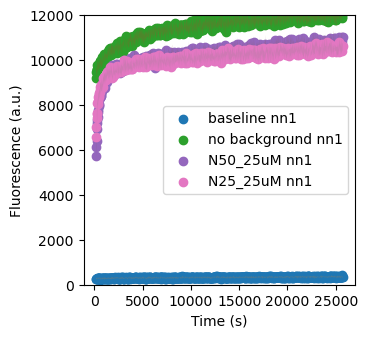

--------------UW_NoInc_nn2----------------


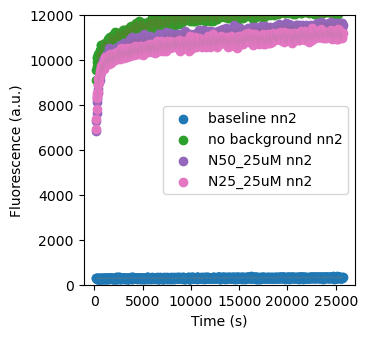

--------------UW_RepInc_nn1----------------


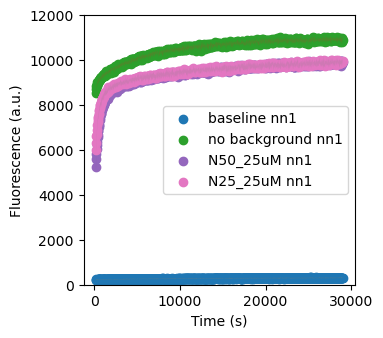

--------------UW_RepInc_nn2----------------


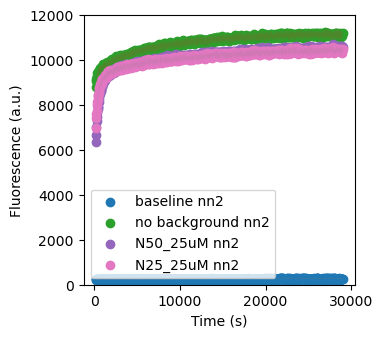

In [3]:
data = [UW_no, UW_no, UW_rep, UW_rep,]
conditions = [conditions_UW_no_nn1, conditions_UW_no_nn2, conditions_UW_rep_nn1, conditions_UW_rep_nn2]
offset = [offset_UW_no, offset_UW_no, offset_UW_rep, offset_UW_rep]
t = [t_UW_no, t_UW_no, t_UW_rep, t_UW_rep]
case_names = ['UW_NoInc_nn1', 'UW_NoInc_nn2', 'UW_RepInc_nn1', 'UW_RepInc_nn2']

#plotting unnormalized kinetic curves for each case
for i, case in enumerate(case_names):
        print(f"--------------{case}----------------")
        fig, ax = plt.subplots(1, 1, figsize=(3.5, 3.5))
        for level in conditions[i].keys():
                x, y, std = get_average_curve(0, offset[i], level, t[i], data[i], conditions[i], (0,1))
                x = np.array(x)
                y = np.array(y)
                std = np.array(std)
                ax.scatter(x, y, label = level)
                ax.fill_between(x, y-std, y+std, alpha=0.2)
                ax.set_ylim(0, 12000)
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Fluorescence (a.u.)')
        plt.legend(fontsize=10)
        plt.show()


# 6H completion

In [4]:
time_point = 3600*6

t = t_UW_no
data = UW_no
conditions = conditions_UW_no
controls = data

UW_no_nn1_N25_25uM = completion_at_time(data, controls, t, time_point, conditions, conditions,'baseline nn1', 'no background nn1', 'N25_25uM nn1', verbose = True)
UW_no_nn1_N50_25uM = completion_at_time(data, controls, t, time_point, conditions, conditions,'baseline nn1', 'no background nn1', 'N50_25uM nn1', verbose = True)
UW_no_nn2_N25_25uM = completion_at_time(data, controls, t, time_point, conditions, conditions,'baseline nn2', 'no background nn2', 'N25_25uM nn2', verbose = True)
UW_no_nn2_N50_25uM = completion_at_time(data, controls, t, time_point, conditions, conditions,'baseline nn2', 'no background nn2', 'N50_25uM nn2', verbose = True)
UW_no_diff_N25_25uM = [(UW_no_nn2_N25_25uM[0] - UW_no_nn1_N25_25uM[0]), np.sqrt(UW_no_nn2_N25_25uM[1]**2 + UW_no_nn1_N25_25uM[1]**2)]
UW_no_diff_N50_25uM = [(UW_no_nn2_N50_25uM[0] - UW_no_nn1_N50_25uM[0]), np.sqrt(UW_no_nn2_N50_25uM[1]**2 + UW_no_nn1_N50_25uM[1]**2)]
print(f"diff_N25_25uM: {UW_no_diff_N25_25uM[0]} +/- {UW_no_diff_N25_25uM[1]}")
print(f"diff_N50_25uM: {UW_no_diff_N50_25uM[0]} +/- {UW_no_diff_N50_25uM[1]}")

N25_25uM nn1 : 0.8618894151919348 +/- 0.010596642034912665
N50_25uM nn1 : 0.8991925772155382 +/- 0.023531907844196388
N25_25uM nn2 : 0.8793486999328216 +/- 0.013615689140103433
N50_25uM nn2 : 0.9030813959891192 +/- 0.022368665354685853
diff_N25_25uM: 0.01745928474088676 +/- 0.017253284127261355
diff_N50_25uM: 0.0038888187735809376 +/- 0.03246702752851999


In [5]:
time_point = 3600*6

t = t_UW_rep
data = UW_rep
conditions = conditions_UW_rep

controls = data

UW_rep_nn1_N25_25uM = completion_at_time(data, controls, t, time_point, conditions, conditions,'baseline nn1', 'no background nn1', 'N25_25uM nn1', verbose = True)
UW_rep_nn1_N50_25uM = completion_at_time(data, controls, t, time_point, conditions, conditions,'baseline nn1', 'no background nn1', 'N50_25uM nn1', verbose = True)
UW_rep_nn2_N25_25uM = completion_at_time(data, controls, t, time_point, conditions, conditions,'baseline nn2', 'no background nn2', 'N25_25uM nn2', verbose = True)
UW_rep_nn2_N50_25uM = completion_at_time(data, controls, t, time_point, conditions, conditions,'baseline nn2', 'no background nn2', 'N50_25uM nn2', verbose = True)
UW_rep_diff_N25_25uM = [(UW_rep_nn2_N25_25uM[0] - UW_rep_nn1_N25_25uM[0]), np.sqrt(UW_rep_nn2_N25_25uM[1]**2 + UW_rep_nn1_N25_25uM[1]**2)]
UW_rep_diff_N50_25uM = [(UW_rep_nn2_N50_25uM[0] - UW_rep_nn1_N50_25uM[0]), np.sqrt(UW_rep_nn2_N50_25uM[1]**2 + UW_rep_nn1_N50_25uM[1]**2)]
print(f"diff_N25_25uM: {UW_rep_diff_N25_25uM[0]} +/- {UW_rep_diff_N25_25uM[1]}")
print(f"diff_N50_25uM: {UW_rep_diff_N50_25uM[0]} +/- {UW_rep_diff_N50_25uM[1]}")

N25_25uM nn1 : 0.894898659929563 +/- 0.0076495931950056354
N50_25uM nn1 : 0.8934810959974295 +/- 0.016624335697402643
N25_25uM nn2 : 0.9354941349960534 +/- 0.011302329751431655
N50_25uM nn2 : 0.9310884982285671 +/- 0.00671398577884499
diff_N25_25uM: 0.040595475066490416 +/- 0.013647671371306304
diff_N50_25uM: 0.037607402231137566 +/- 0.017928919164814944


# Figures

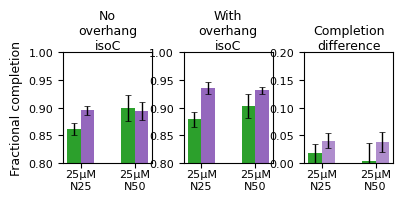

=== One-sample t-tests: each completion difference vs 0 (with Holm correction) ===
N25, no incubation: t = 1.753, raw p = 0.2217, Holm p = 0.4435
N25, reporter incubation: t = 5.152, raw p = 0.03567, Holm p = 0.1427
N50, no incubation: t = 0.207, raw p = 0.8549, Holm p = 0.8549
N50, reporter incubation: t = 3.633, raw p = 0.06811, Holm p = 0.2043


In [6]:
fig, ax = plt.subplots(1, 3)
fig.set_figwidth(3.75)
fig.set_figheight(1.5)

# Reduce whitespace and expand axes area
plt.subplots_adjust(
    left=0.10,   # default ~0.125 → expand
    right=0.98,
    top=0.92,
    bottom=0.18,
    wspace=0.35  # reduce inter-panel whitespace
)

labels = [u"25\u03bcM\nN25", u"25\u03bcM\nN50"]
x = np.arange(len(labels))
bar_width = 0.25

datasets_panel0 = [
    ([UW_no_nn1_N25_25uM, UW_no_nn1_N50_25uM],
     [UW_no_nn2_N25_25uM, UW_no_nn2_N50_25uM],
     color_scheme[2], 1.0),

    ([UW_rep_nn1_N25_25uM, UW_rep_nn1_N50_25uM],
     [UW_rep_nn2_N25_25uM, UW_rep_nn2_N50_25uM],
     color_scheme[4], 1),
]

datasets_panel1 = [
    ([UW_no_diff_N25_25uM, UW_no_diff_N50_25uM], color_scheme[2], 1.0),
    ([UW_rep_diff_N25_25uM, UW_rep_diff_N50_25uM], color_scheme[4], 0.75),
]

error_params = dict(ecolor='black', lw=1, capsize=2.5, capthick=0.5)

# --- Panels 0 and 1 ---
for i, (nn1_list, nn2_list, color, scale) in enumerate(datasets_panel0):
    dx = (i - 0.5) * bar_width

    # Panel 0
    nn1_y = [v[0] for v in nn1_list]
    nn1_err = [v[1] for v in nn1_list]
    ax[0].bar(x + dx, nn1_y, width=bar_width, yerr=nn1_err,
              color=color, alpha=scale, error_kw=error_params)

    # Panel 1
    nn2_y = [v[0] for v in nn2_list]
    nn2_err = [v[1] for v in nn2_list]
    ax[1].bar(x + dx, nn2_y, width=bar_width, yerr=nn2_err,
              color=color, alpha=scale, error_kw=error_params)

# --- Panel 2: diff ---
for i, (diff_list, color, scale) in enumerate(datasets_panel1):
    dx = (i - 0.5) * bar_width
    diff_y = [v[0] for v in diff_list]
    diff_err = [v[1] for v in diff_list]
    ax[2].bar(x + dx, diff_y, width=bar_width, yerr=diff_err,
              color=color, alpha=scale, error_kw=error_params)

# --- Formatting ---
for a in ax:
    a.set_xticks(x)
    a.set_xticklabels(labels, fontsize=8)
    a.tick_params(axis='x', labelrotation=0, pad=1)
    for spine in a.spines.values():
        spine.set_visible(True)

ax[0].set_ylim(0.8, 1)
ax[1].set_ylim(0.8, 1)
ax[2].set_ylim(0, 0.2)

ax[0].set_ylabel('Fractional completion', fontsize=9)
for a in ax:
    a.set_xticklabels(labels, fontsize=9)
    a.tick_params(axis='both', labelsize=8)


ax[0].set_title('No\noverhang\nisoC', fontsize=9, pad=2)
ax[1].set_title('With\noverhang\nisoC', fontsize=9, pad=2)
ax[2].set_title('Completion\ndifference', fontsize=9, pad=2)

plt.savefig('Figures/NAR_longOH.svg', dpi=400)
plt.show()



print("=== One-sample t-tests: each completion difference vs 0 (with Holm correction) ===")

# Adjust if your number of replicates per bar is different
n_reps = 3

# Each entry: (label, (mean, std))
bars = [
    ("N25, no incubation",       UW_no_diff_N25_25uM),
    ("N25, reporter incubation", UW_rep_diff_N25_25uM),
    ("N50, no incubation",       UW_no_diff_N50_25uM),
    ("N50, reporter incubation", UW_rep_diff_N50_25uM),
]

from scipy.stats import t

def one_sample_t_from_stats(mean, std, n, mu0=0.0):
    """One-sample t-test from summary stats."""
    t_stat = (mean - mu0) / (std / np.sqrt(n))
    df = n - 1
    p_val = 2 * (1 - t.cdf(abs(t_stat), df))
    return t_stat, p_val

raw_pvals = []
results = []

for label, (mean_val, std_val) in bars:
    t_stat, p_val = one_sample_t_from_stats(mean_val, std_val, n_reps, mu0=0.0)
    raw_pvals.append(p_val)
    results.append((label, t_stat, p_val))

# Holm correction across the 4 tests
m = len(raw_pvals)
sorted_idx = sorted(range(m), key=lambda i: raw_pvals[i])
holm_p = [None] * m

for rank, idx in enumerate(sorted_idx, start=1):
    adj = raw_pvals[idx] * (m - rank + 1)
    holm_p[idx] = min(1.0, adj)

for (label, t_stat, p_raw), p_adj in zip(results, holm_p):
    print(f"{label}: t = {t_stat:.3f}, raw p = {p_raw:.4g}, Holm p = {p_adj:.4g}")
